# Time Series Analysis with Pandas

## Import Modules

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.dates as mdates

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(10,5),
            'font.size':14,
            'axes.titlesize':16,
            'axes.labelsize':14,
            'xtick.labelsize': 12,
            'ytick.labelsize': 12,
            'legend.fontsize': 12})

## Load Data

In [2]:
# room number
x = 'E07'

In [8]:
raw_data = pd.read_csv("\Pre-Processing\data_E07.csv", parse_dates=True)
data = raw_data.copy()
data['DateTime'] = pd.to_datetime(data['DateTime'])
data = data.set_index('DateTime')

In [3]:
data.head(5)

,E07Occ,E07SP,E07W,E07WT,E07CO2,E07ElL,E07ElPIT,E07ElPo,E07Tair,Year,Month,Day,Weekday Name,Hour,Minute,Second
DateTime,,,,,,,,,,,,,,,,
2005-01-03 08:20:00,1.0,0,1.0,0.0,675.679,309.9,152,744.0,20.2,2005,1,3,Monday,8,20,0
2005-01-03 08:30:00,1.0,0,1.0,0.0,634.949,310.0,152,744.0,19.2,2005,1,3,Monday,8,30,0
2005-01-03 08:40:00,1.0,0,0.0,0.0,606.654,310.0,152,744.0,19.4,2005,1,3,Monday,8,40,0
2005-01-03 08:50:00,1.0,0,1.0,0.0,585.756,310.0,152,744.0,20.2,2005,1,3,Monday,8,50,0
2005-01-03 09:00:00,1.0,0,0.0,0.0,572.781,310.1,152,744.1,19.4,2005,1,3,Monday,9,0,0


In [5]:
data.tail(5)

,E07Occ,E07SP,E07W,E07WT,E07CO2,E07ElL,E07ElPIT,E07ElPo,E07Tair,Year,Month,Day,Weekday Name,Hour,Minute,Second
DateTime,,,,,,,,,,,,,,,,
2006-11-14 15:00:00,1.0,0,0.0,0.0,636.731,448.6,152,1430.3,22.4,2006,11,14,Tuesday,15,0,0
2006-11-14 15:10:00,0.0,0,0.0,0.0,619.504,448.6,152,1430.3,22.4,2006,11,14,Tuesday,15,10,0
2006-11-14 15:20:00,0.0,0,0.0,0.0,607.750,448.6,152,1430.3,22.4,2006,11,14,Tuesday,15,20,0
2006-11-14 15:30:00,0.0,0,0.0,0.0,631.588,448.6,152,1430.4,22.8,2006,11,14,Tuesday,15,30,0
2006-11-14 15:40:00,1.0,0,0.0,0.0,627.833,448.6,152,1430.4,22.8,2006,11,14,Tuesday,15,40,0


In [6]:
data.sample(5)

,E07Occ,E07SP,E07W,E07WT,E07CO2,E07ElL,E07ElPIT,E07ElPo,E07Tair,Year,Month,Day,Weekday Name,Hour,Minute,Second
DateTime,,,,,,,,,,,,,,,,
2006-02-14 17:30:00,1.0,0,0.0,0.0,485.252,413.8,152,1174.2,22.7,2006,2,14,Tuesday,17,30,0
2006-07-20 14:10:00,1.0,99,1.0,0.0,656.000,428.9,152,1337.0,27.7,2006,7,20,Thursday,14,10,0
2005-06-24 03:30:00,0.0,0,0.0,1.0,460.250,352.4,152,922.1,25.8,2005,6,24,Friday,3,30,0
2006-10-23 03:10:00,0.0,0,0.0,0.0,449.250,438.6,152,1420.5,21.3,2006,10,23,Monday,3,10,0
2005-11-21 04:20:00,0.0,0,0.0,0.0,462.628,377.3,152,1083.1,19.8,2005,11,21,Monday,4,20,0


In [7]:
data.shape

(91557, 16)

In [8]:
data.dtypes

E07Occ          float64
E07SP             int64
E07W            float64
E07WT           float64
E07CO2          float64
E07ElL          float64
E07ElPIT          int64
E07ElPo         float64
E07Tair         float64
Year              int64
Month             int64
Day               int64
Weekday Name     object
Hour              int64
Minute            int64
Second            int64
dtype: object

In [9]:
data.describe()

,E07Occ,E07SP,E07W,E07WT,E07CO2,E07ElL,E07ElPIT,E07ElPo,E07Tair,Year,Month,Day,Hour,Minute,Second
count,91557.000000,91557.000000,91557.000000,91557.000000,91557.000000,91557.000000,91557.0,91557.000000,91557.000000,91557.000000,91557.000000,91557.000000,91557.000000,91557.000000,91557.0
mean,0.174143,5.597267,0.095023,0.136822,496.721861,386.591823,152.0,1096.325807,22.278707,2005.464290,6.121815,15.478238,11.460347,24.921306,0.0
std,0.379234,21.932915,0.293248,0.343661,84.415281,38.087567,0.0,205.373346,1.773175,0.498726,3.267683,8.701984,6.899948,17.048527,0.0
min,0.000000,0.000000,0.000000,0.000000,351.503000,309.900000,152.0,744.000000,17.200000,2005.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,443.809000,352.300000,152.0,913.400000,21.100000,2005.000000,3.000000,8.000000,5.000000,10.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,471.651000,387.300000,152.0,1103.500000,21.800000,2005.000000,6.000000,15.000000,11.000000,20.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,521.750000,425.300000,152.0,1271.800000,23.200000,2006.000000,9.000000,23.000000,17.000000,40.000000,0.0
max,1.000000,100.000000,1.000000,1.000000,1492.190000,448.600000,152.0,1430.400000,29.300000,2006.000000,12.000000,31.000000,23.000000,50.000000,0.0


## Visualizing time series data

#### Seperate line plots of the full time series for each variable

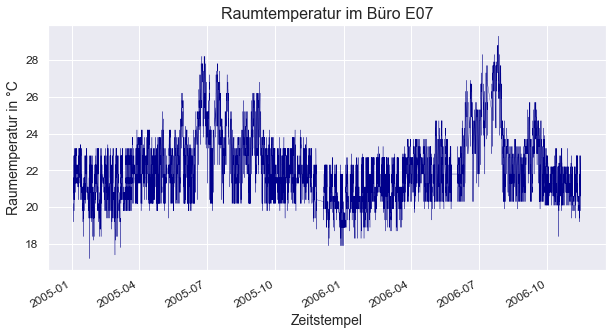

In [10]:
figure1 = data[x+'Tair'].plot(linewidth=0.3, color='darkblue')# figsize=(20,10))
figure1.set_title('Raumtemperatur im Büro '+x)
figure1.set_ylabel('Raumemperatur in °C')
figure1.set_xlabel('Zeitstempel')
plt.savefig('Tair_'+x+'.pdf', bbox_inches='tight', dpi=20)
plt.show()

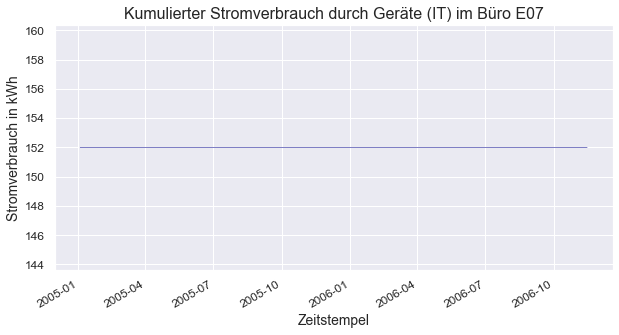

In [11]:
figure2 =data[x+'ElPIT'].plot(linewidth=0.5, color='darkblue')
figure2.set_title('Kumulierter Stromverbrauch durch Geräte (IT) im Büro '+x)
figure2.set_ylabel('Stromverbrauch in kWh')
figure2.set_xlabel('Zeitstempel')
plt.savefig('ElPIT_'+x+'.pdf', bbox_inches='tight', dpi=20)
plt.show()

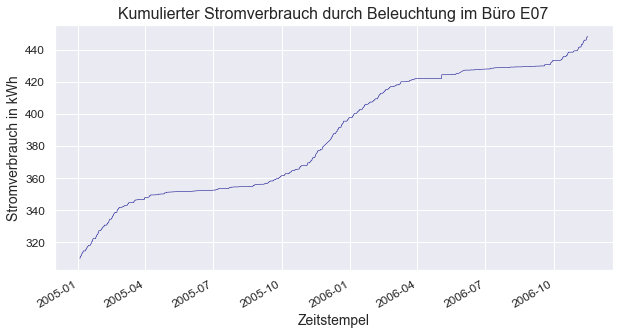

In [12]:
figure3 = data[x+'ElL'].plot(linewidth=0.5, color='darkblue')
figure3.set_title('Kumulierter Stromverbrauch durch Beleuchtung im Büro '+x)
figure3.set_ylabel('Stromverbrauch in kWh')
figure3.set_xlabel('Zeitstempel')
plt.savefig('ElL_'+x+'.pdf', bbox_inches='tight', dpi=20)

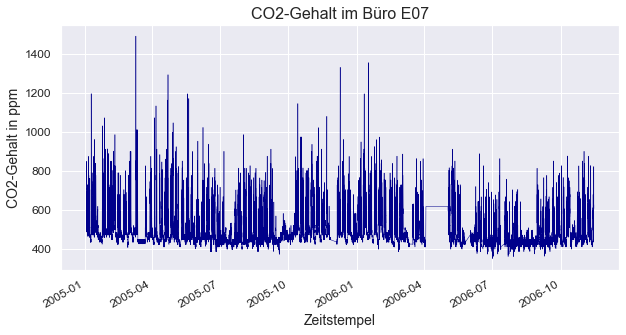

In [13]:
figure4 = data[x+'CO2'].plot(linewidth=0.5, color='darkblue')
figure4.set_title('CO2-Gehalt im Büro '+x)
figure4.set_ylabel('CO2-Gehalt in ppm')
figure4.set_xlabel('Zeitstempel')

plt.savefig('CO2_'+x+'.pdf', bbox_inches='tight', dpi=20)
plt.show()

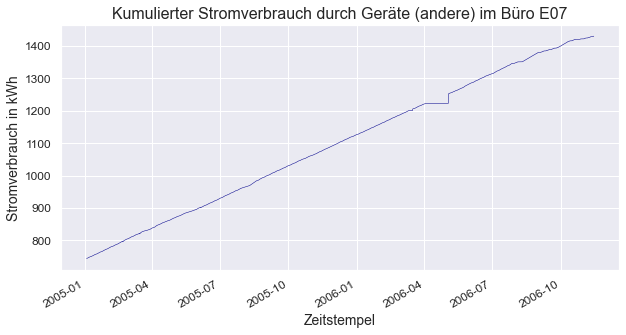

In [14]:
figure5 = data[x+'ElPo'].plot(linewidth=0.5, color='darkblue')
figure5.set_title('Kumulierter Stromverbrauch durch Geräte (andere) im Büro '+x)
figure5.set_ylabel('Stromverbrauch in kWh')
figure5.set_xlabel('Zeitstempel')

plt.savefig('ElPo_'+x+'.pdf',bbox_inches='tight', dpi=20)
plt.show()

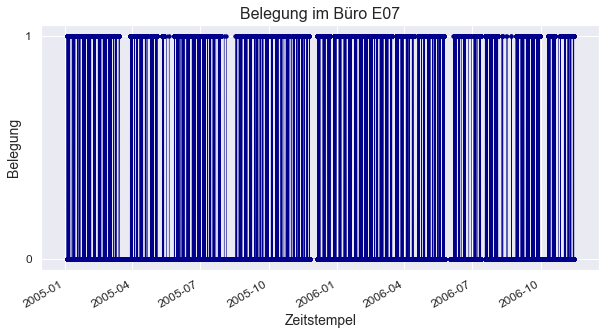

In [15]:
figure6 = data[x+'Occ'].plot(linewidth=0.3, marker='.', color='darkblue')
figure6.set_title('Belegung im Büro '+x)
figure6.set_ylabel('Belegung')
figure6.set_xlabel('Zeitstempel')
plt.yticks(np.arange(0, 2, 1.0))

plt.savefig('Occ_'+x+'.pdf', bbox_inches='tight', dpi=20)
plt.show()

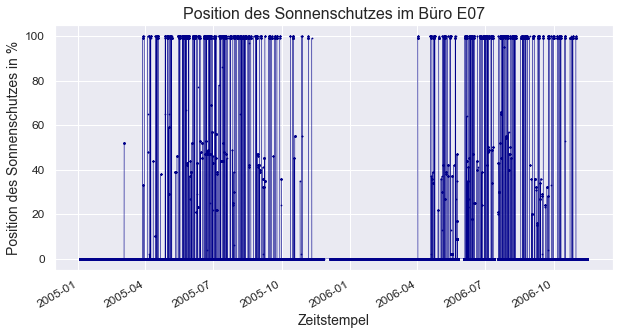

In [16]:
figure7 = data[x+'SP'].plot(linewidth=0.3, marker='.', markersize=1.5, color='darkblue')
figure7.set_title('Position des Sonnenschutzes im Büro '+x)
figure7.set_ylabel('Position des Sonnenschutzes in %')
figure7.set_xlabel('Zeitstempel')
#plt.yticks(np.arange(0, 2, 1.0))

plt.savefig('SP_'+x+'.pdf', bbox_inches='tight', dpi=20)
plt.show()

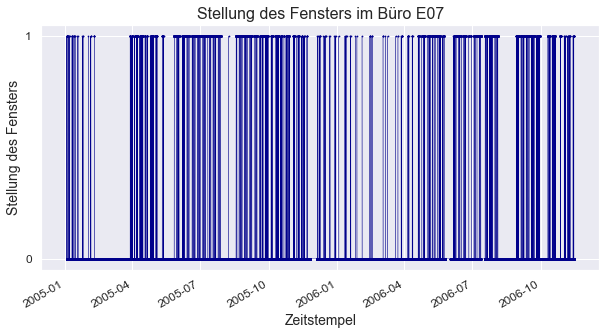

In [17]:
figure8 = data[x+'W'].plot(linewidth=0.3, color='darkblue', marker='.', markersize=1.5)
figure8.set_title('Stellung des Fensters im Büro '+x)
figure8.set_ylabel('Stellung des Fensters')
figure8.set_xlabel('Zeitstempel')
plt.yticks(np.arange(0, 2, 1.0))

plt.savefig('W_'+x+'.pdf', bbox_inches='tight', dpi=20)

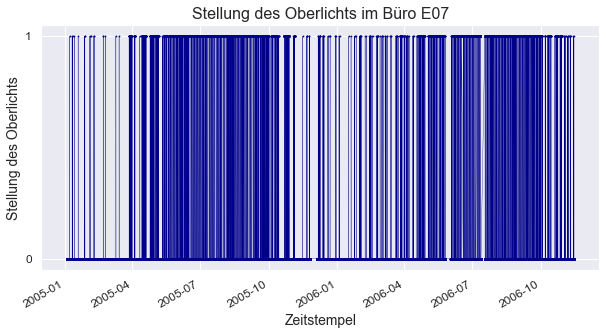

In [18]:
figure9 = data[x+'WT'].plot(linewidth=0.3, color='darkblue', marker='.', markersize=1.5)
figure9.set_title('Stellung des Oberlichts im Büro '+x)
figure9.set_ylabel('Stellung des Oberlichts')
figure9.set_xlabel('Zeitstempel')
plt.yticks(np.arange(0, 2, 1.0))

plt.savefig('WT_'+x+'.pdf', bbox_inches='tight', dpi=20)

#### All line plots in one figure

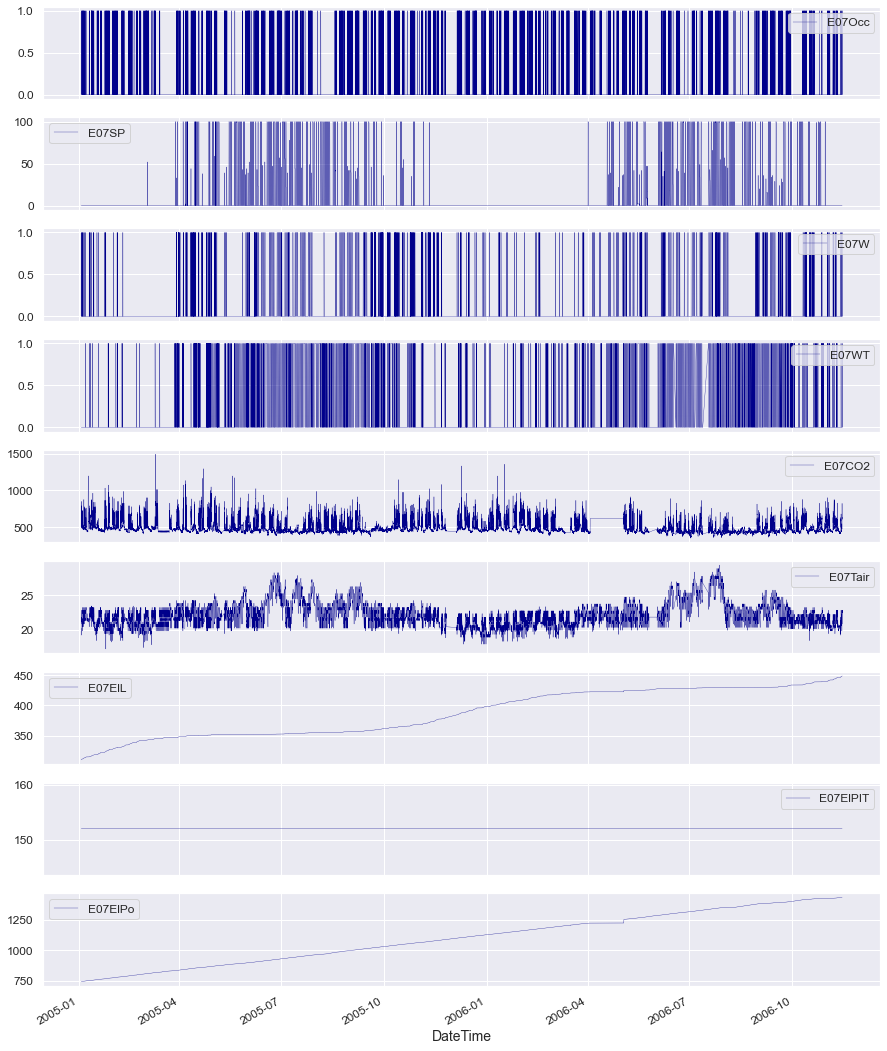

In [19]:
cols_plot = [x+'Occ', x+'SP', x+'W', x+'WT', x+'CO2', x+'Tair', x+'ElL', x+'ElPIT', x+'ElPo', ]
figure10 = data[cols_plot].plot(linestyle='-', linewidth=0.3, subplots=True, color='darkblue', figsize=(15,20)) #figsize=(15,17)
plt.savefig('cols_plot.pdf',bbox_inches='tight', dpi=20)
plt.show()

#### Boxplots

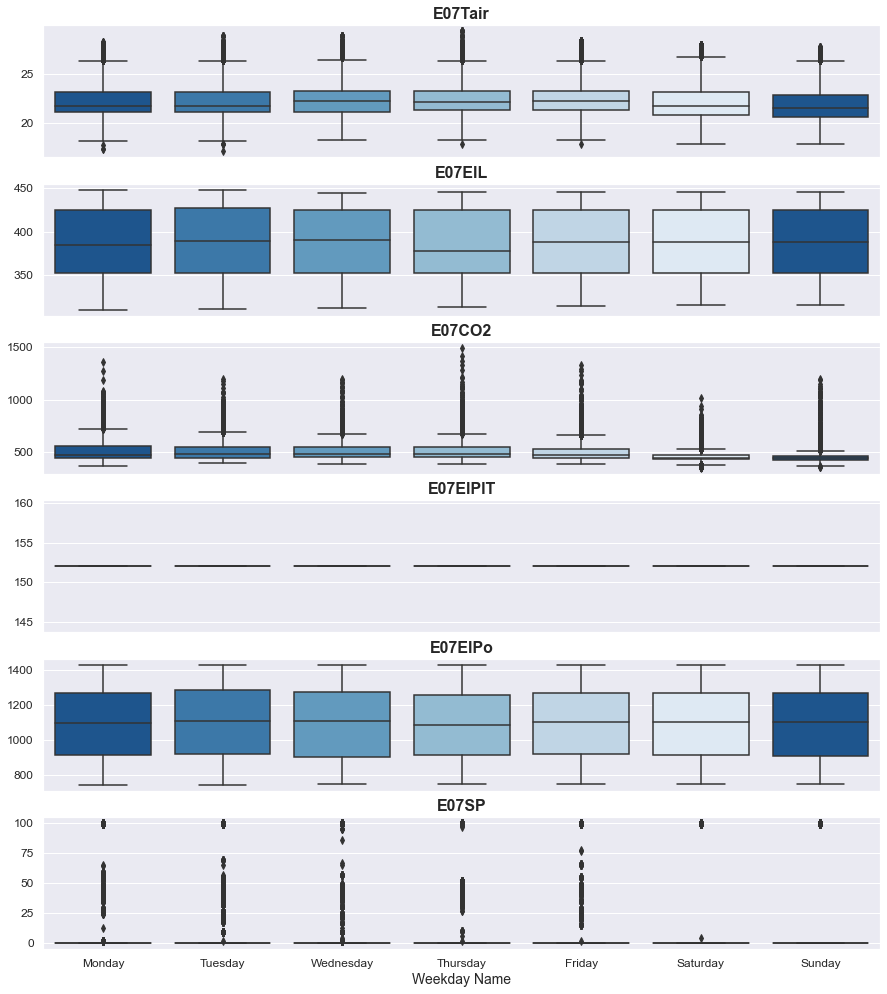

In [20]:
# Boxplot for Weekdays
figure31, axes = plt.subplots(6, 1, figsize=(15,17), sharex=True)
for name, ax in zip([x+'Tair', x+'ElL', x+'CO2', x+'ElPIT', x+'ElPo', x+'SP'], axes):
    sns.boxplot(data=data, x='Weekday Name', y=name, ax=ax, palette=sns.color_palette("Blues_r"))
    ax.set_ylabel('')
    ax.set_title(name, fontweight='bold')
# Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')
        
plt.savefig('Boxplot_Weekdays.pdf',bbox_inches='tight', dpi=20)
plt.show()

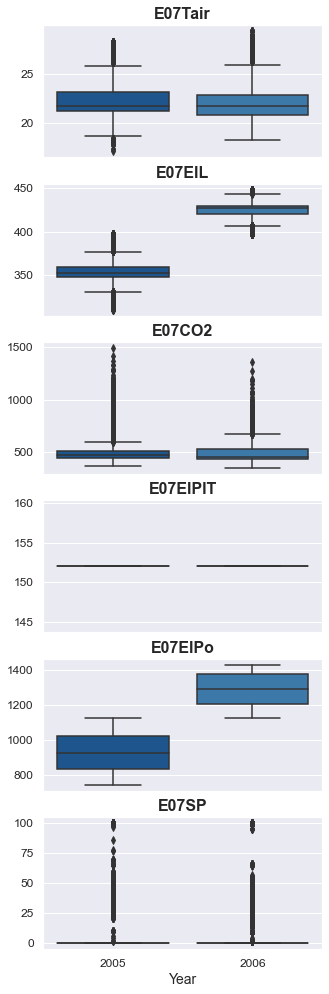

In [21]:
# Boxplots for Years
figure32, axes = plt.subplots(6, 1, figsize=(5,17), sharex=True)
for name, ax in zip([x+'Tair', x+'ElL', x+'CO2', x+'ElPIT', x+'ElPo', x+'SP'], axes):
    sns.boxplot(data=data.loc['2005':'2008'], x='Year', y=name, ax=ax, palette=sns.color_palette("Blues_r"))
    ax.set_ylabel('')
    ax.set_title(name, fontweight='bold')
# Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

plt.savefig('Boxplot_Years.pdf', bbox_inches='tight', dpi=20)        
plt.show()

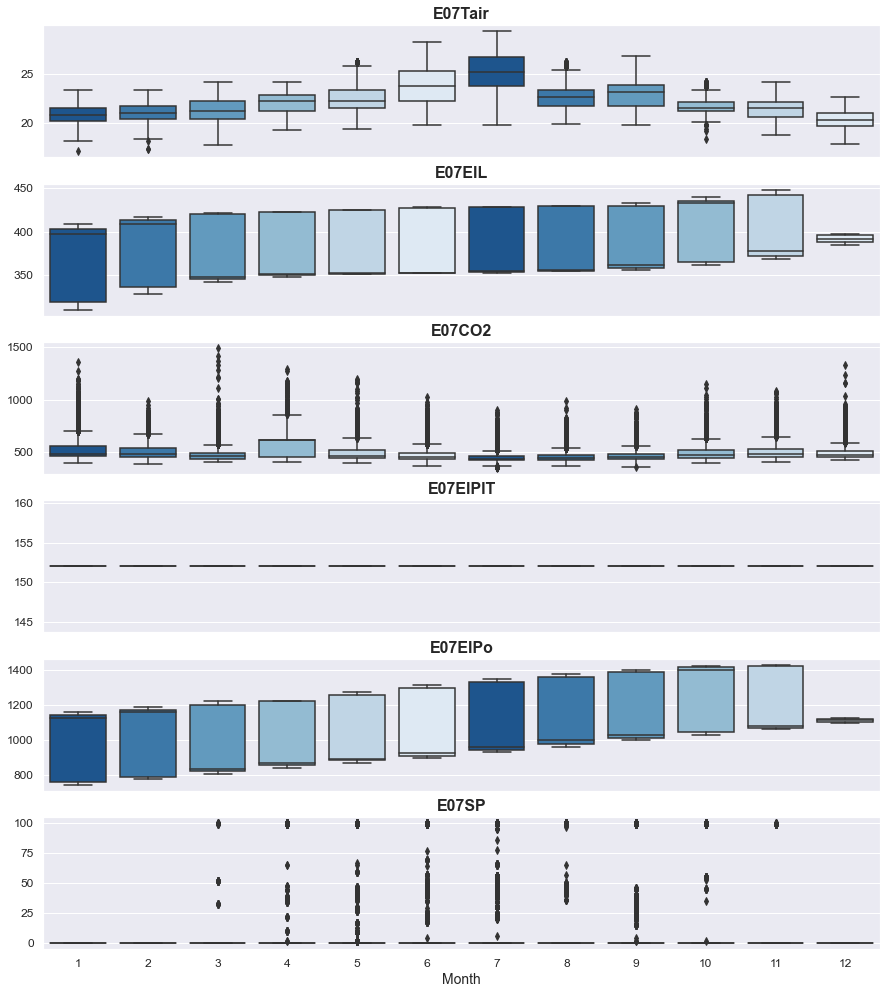

In [22]:
# Boxplots for Months
figure33, axes = plt.subplots(6, 1, figsize=(15,17), sharex=True)
for name, ax in zip([x+'Tair', x+'ElL', x+'CO2', x+'ElPIT', x+'ElPo', x+'SP'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax, palette=sns.color_palette("Blues_r"))
    ax.set_ylabel('')
    ax.set_title(name, fontweight='bold')
# Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')
        
plt.savefig('Boxplot_Months.pdf',bbox_inches='tight', dpi=20)
plt.show()

#### Correlation Matrix

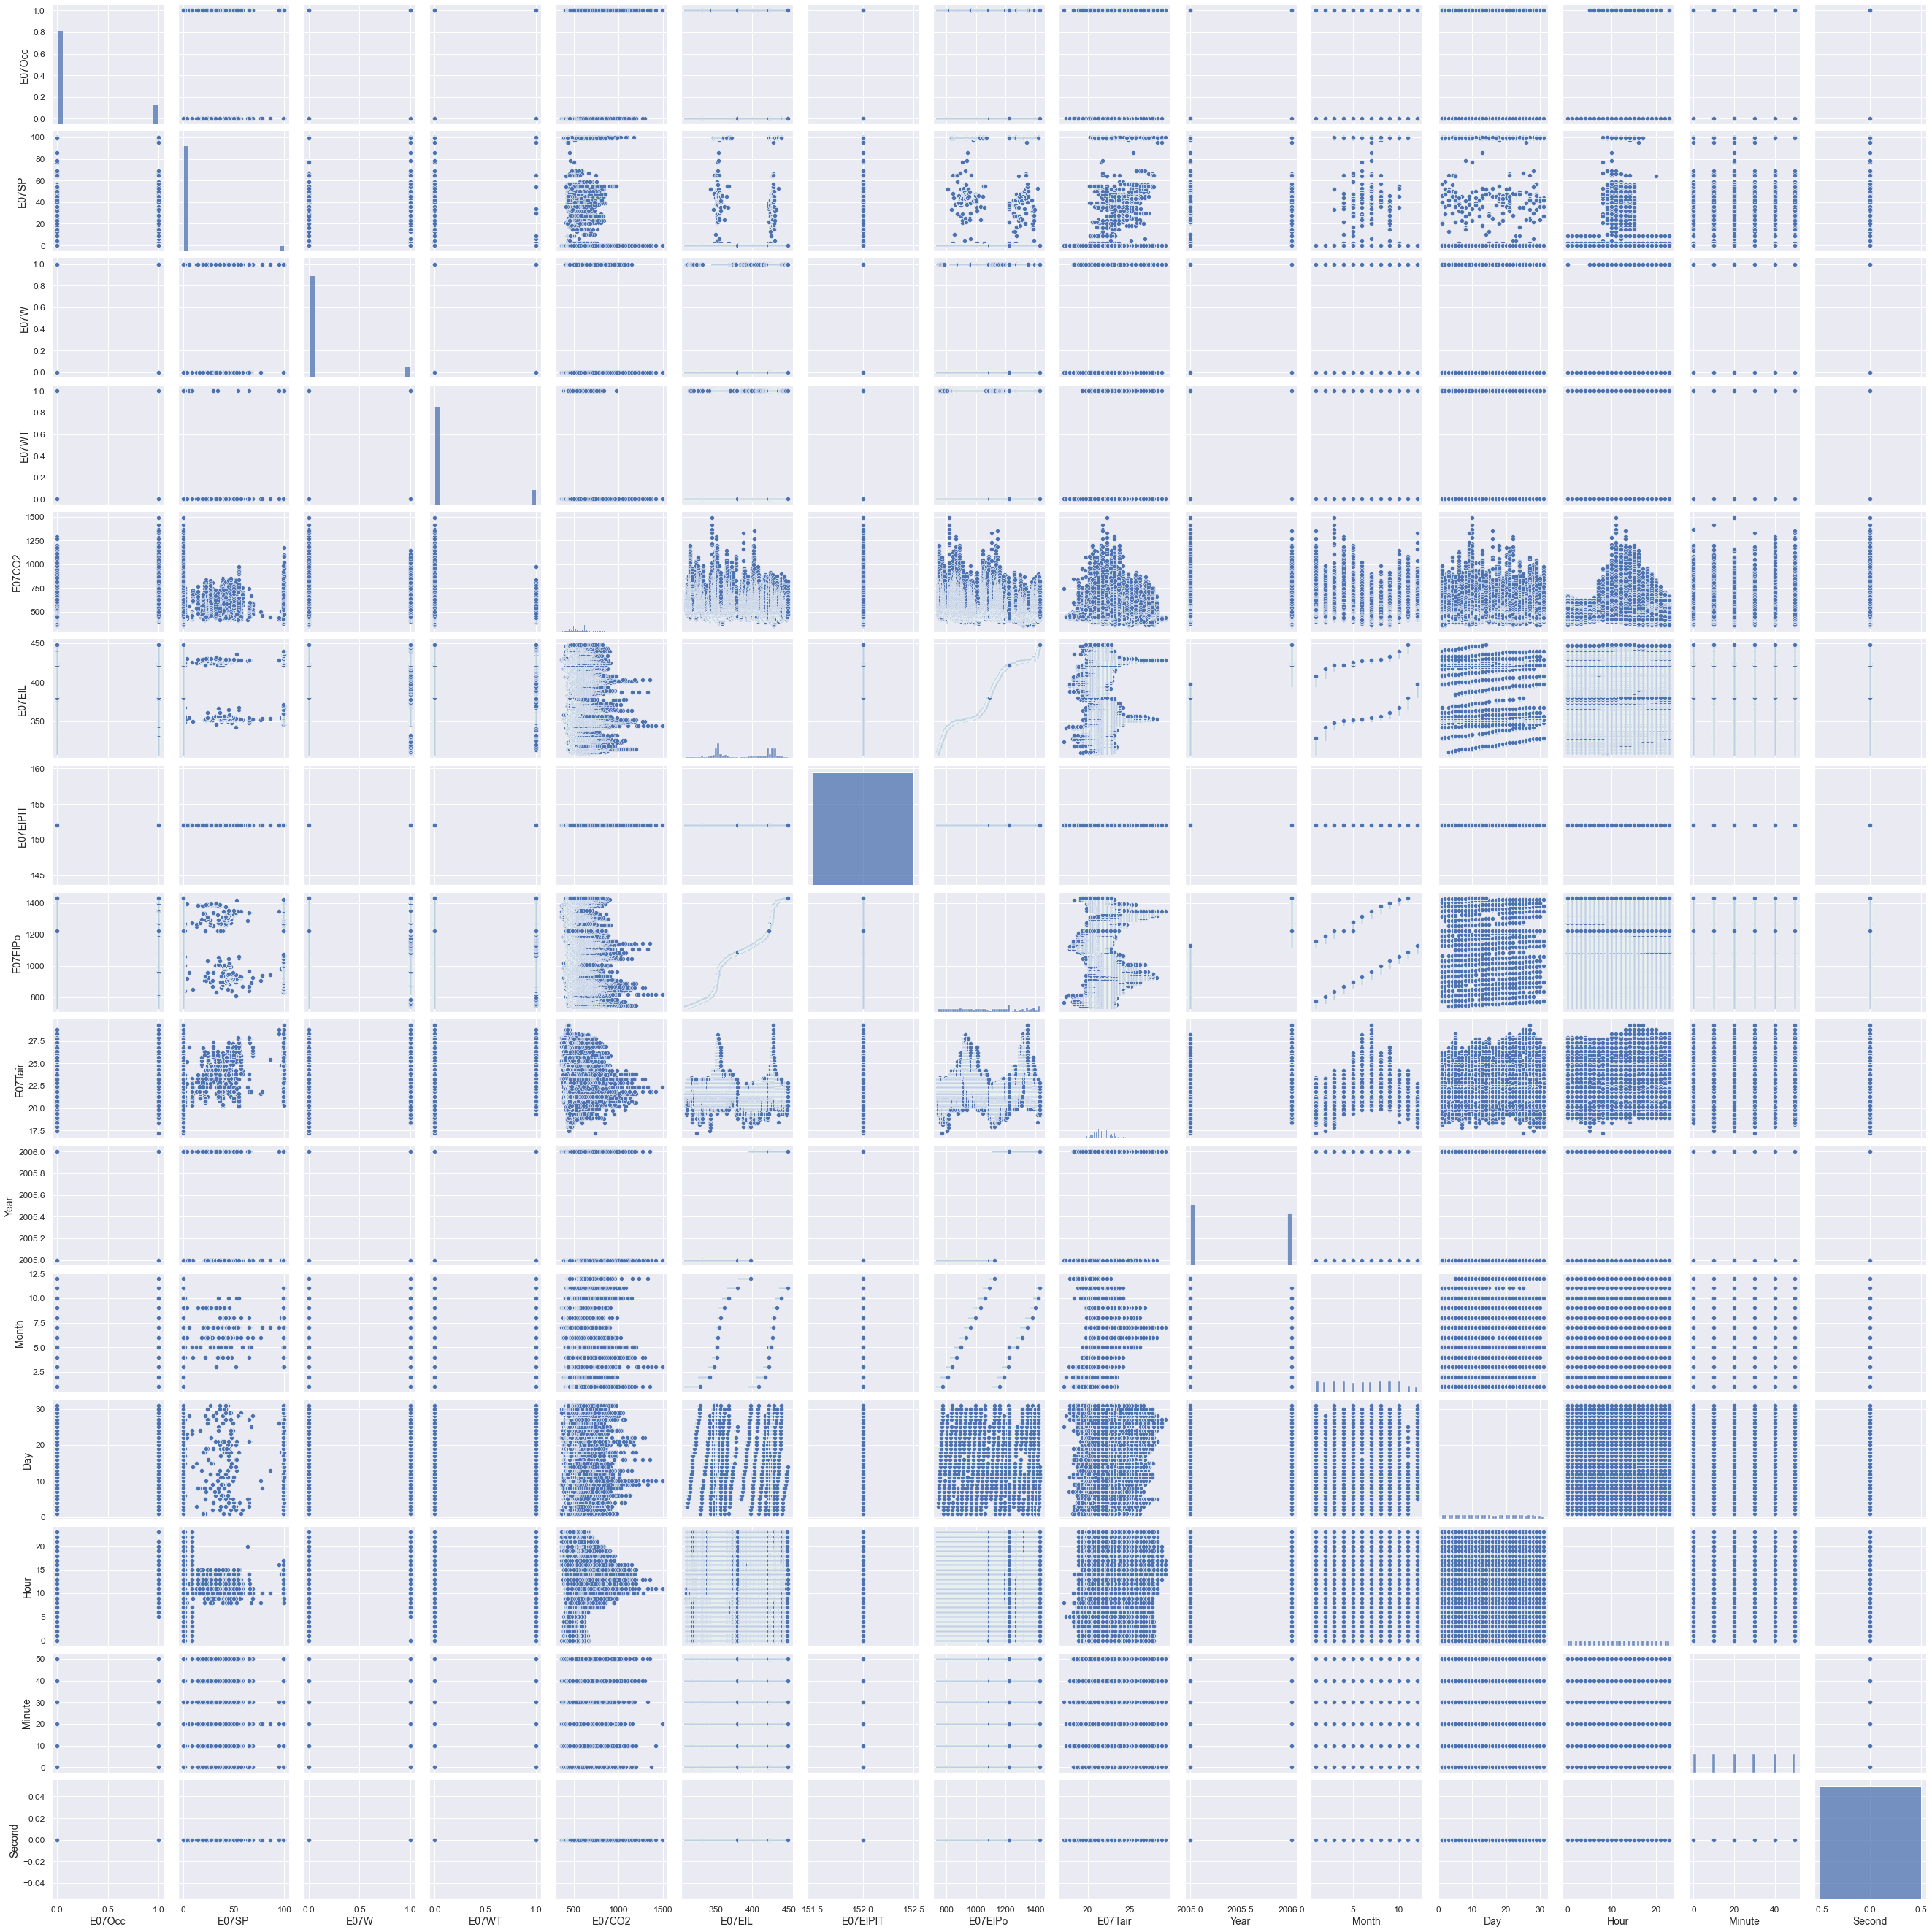

In [27]:
sns.pairplot(data, palette='darkblue')
plt.savefig('correlation_matrix_all.pdf',bbox_inches='tight', dpi=20)
plt.show()

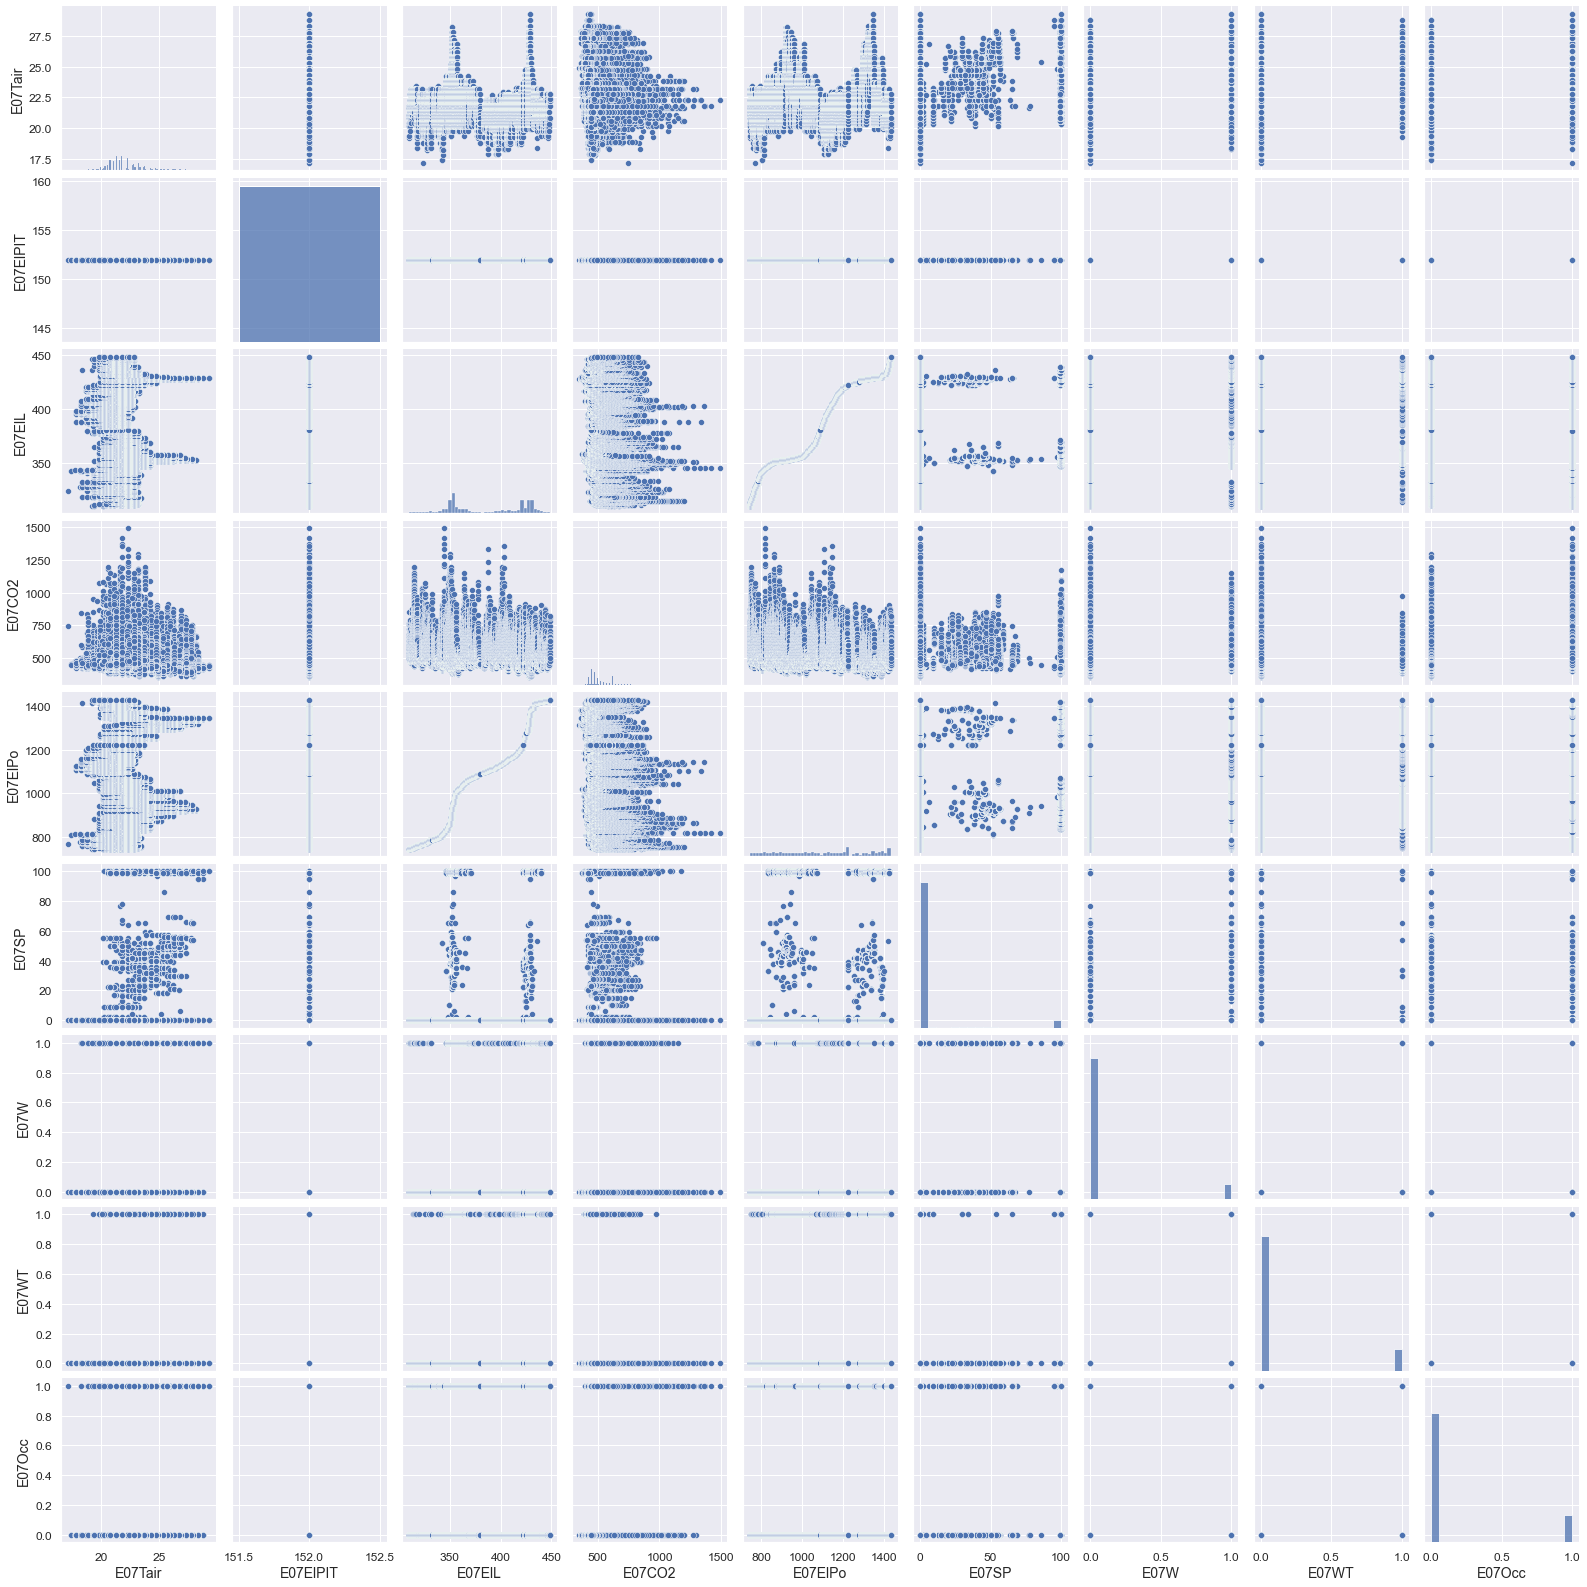

In [54]:
sns.pairplot(data, vars=[x+'Tair', x+'ElPIT', x+'ElL', x+'CO2', x+'ElPo', x+'SP', x+'W', x+'WT', x+'Occ'], palette='Blues')
plt.savefig('correlation_matrix.pdf',bbox_inches='tight', dpi=1)
plt.savefig('correlation_matrix.png',bbox_inches='tight', dpi=150)
plt.show()

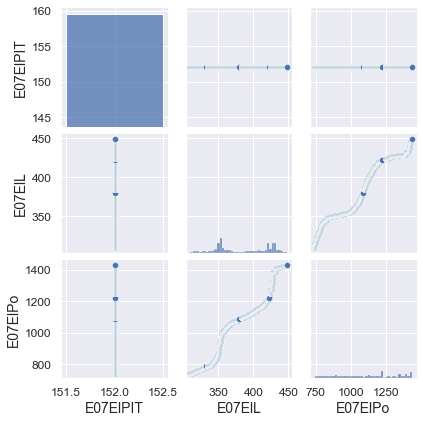

In [62]:
sns.pairplot(data, vars=[x+'ElPIT', x+'ElL', x+'ElPo'], palette='Blues', height=2.0)
#plt.savefig('correlation_matrix.pdf',bbox_inches='tight', dpi=1)
plt.show()

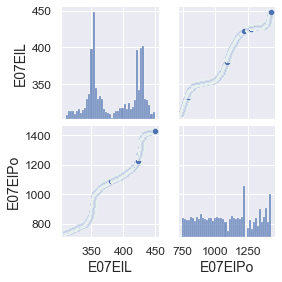

In [69]:
sns.pairplot(data, vars=[x+'ElL', x+'ElPo'], palette='Blues', height=2.0)
plt.savefig('correlation_matrix_ElL_ElPo.pdf',bbox_inches='tight', dpi=10)
plt.savefig('correlation_matrix_ElL_ElPo.png',bbox_inches='tight', dpi=200)
plt.show()

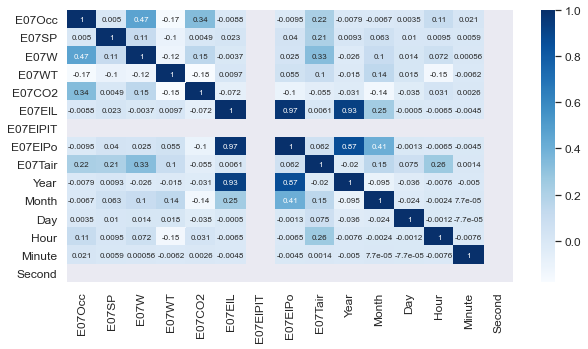

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(), cmap='Blues', annot=True , annot_kws={'size':8})
plt.savefig('heatmap_'+x+'.png',bbox_inches='tight', dpi=100)
plt.savefig('heatmap_'+x+'.pdf',bbox_inches='tight', dpi=100)

plt.show()